# Laboratoio # 5: ABC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) Leer el data frame en formato csv en la dirección: https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2) Entender el estado de los datos.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

En la columna referente al numero de dormitorios, hay varios valores de tipo `NaN`, los cuales pueden ser reemplazados por el valor medio de dicha columna para que la información contenida en el conjunto de datos no se vea alterada.

In [3]:
#df.total_bedrooms = df.total_bedrooms.fillna(np.rint(df.total_bedrooms.mean()))
#df.isna().sum()

3) Determinar los elementos únicos dentro de la columna `ocean_proximity`

Aplicamos el método `.unique()` sobre la columna especificada como se muestra a continuación.

In [4]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

4) Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.

In [5]:
cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
df[cols].groupby(df.ocean_proximity).mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


5) Construye un histograma para cada columna, puede emplear la librería seaborn.

<Axes: xlabel='median_house_value', ylabel='Count'>

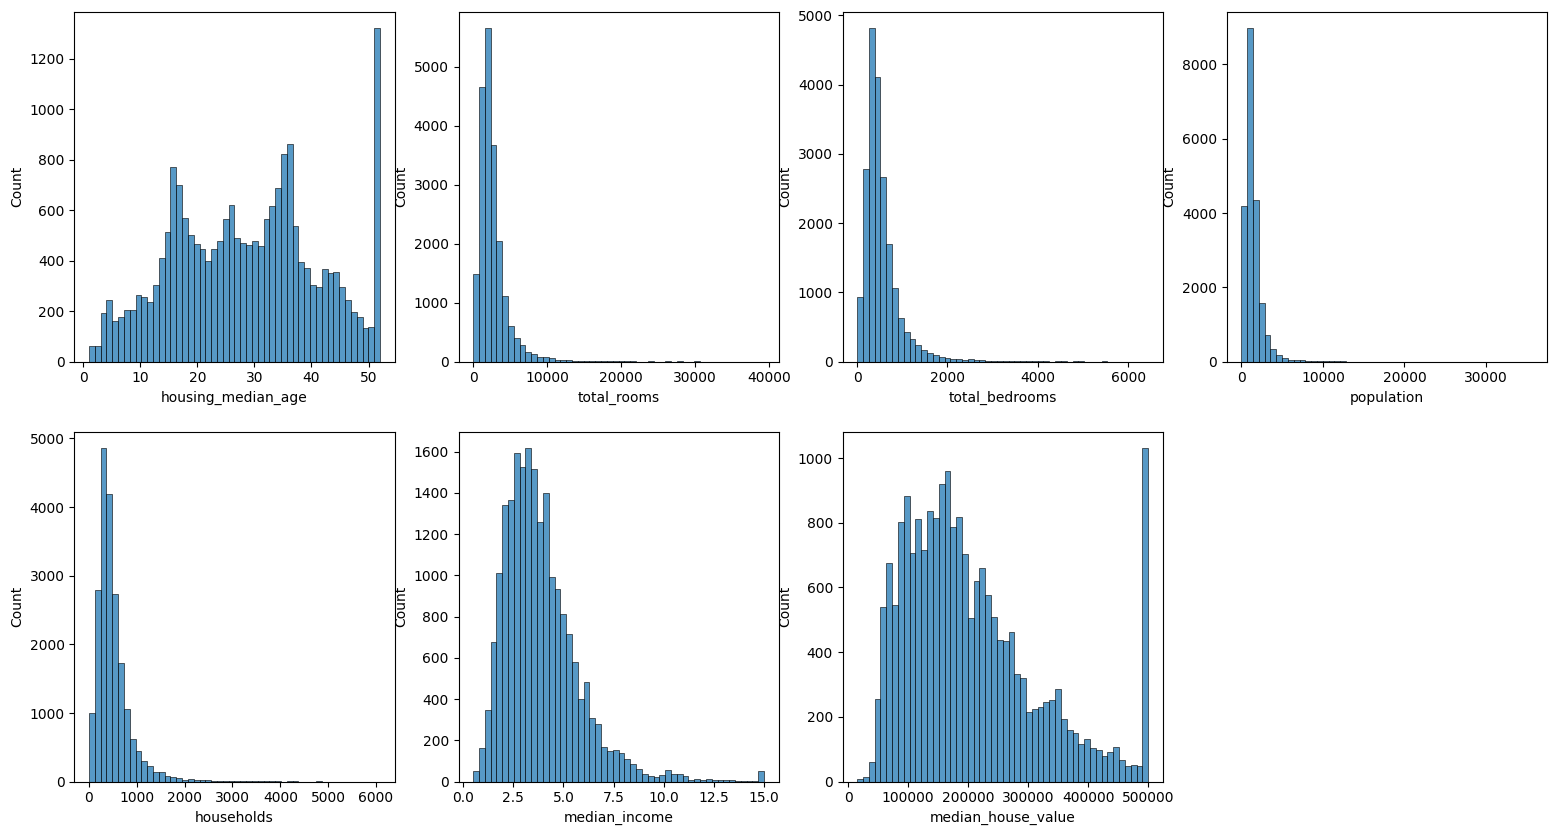

In [6]:
plt.figure(figsize=(19,10))
plt.subplot(2,4,1)
sns.histplot(data=df[cols[0]],bins=50)
plt.subplot(2,4,2)
sns.histplot(data=df[cols[1]],bins=50)
plt.subplot(2,4,3)
sns.histplot(data=df[cols[2]],bins=50)
plt.subplot(2,4,4)
sns.histplot(data=df[cols[3]],bins=50)
plt.subplot(2,4,5)
sns.histplot(data=df[cols[4]],bins=50)
plt.subplot(2,4,6)
sns.histplot(data=df[cols[5]],bins=50)
plt.subplot(2,4,7)
sns.histplot(data=df[cols[6]],bins=50)

7. Gráfico boxplot.

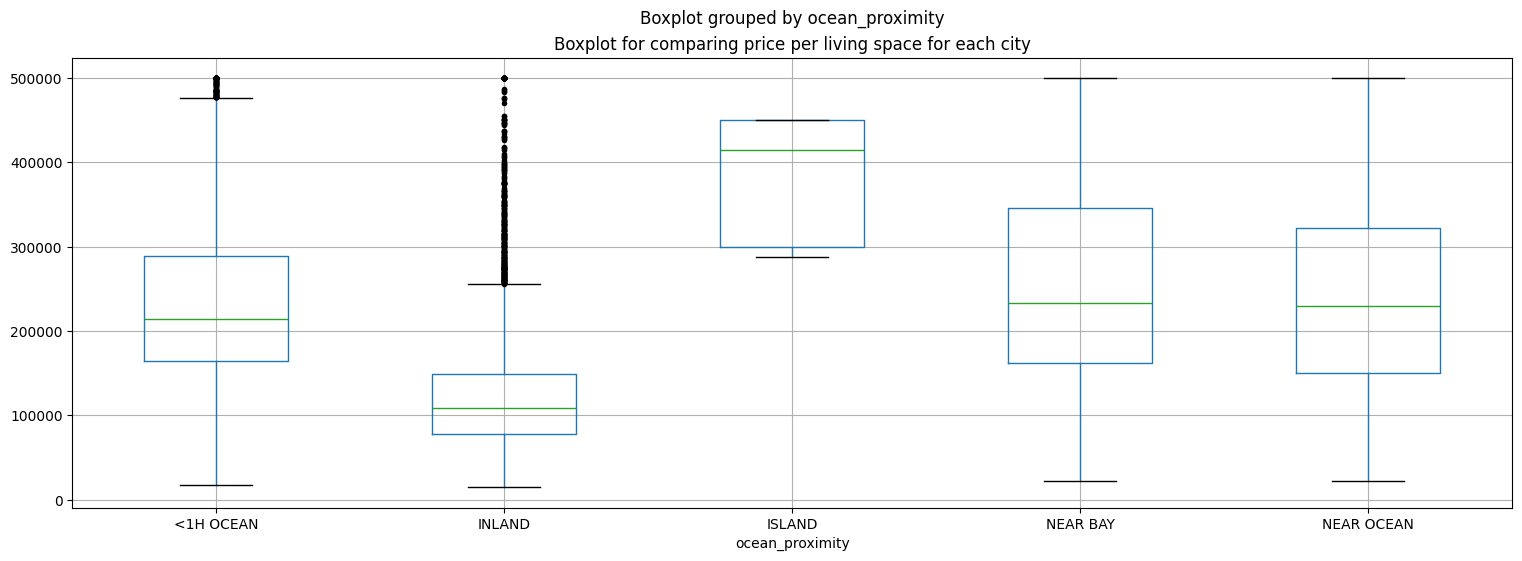

In [7]:
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

8. Determinar la matríz de correlación.

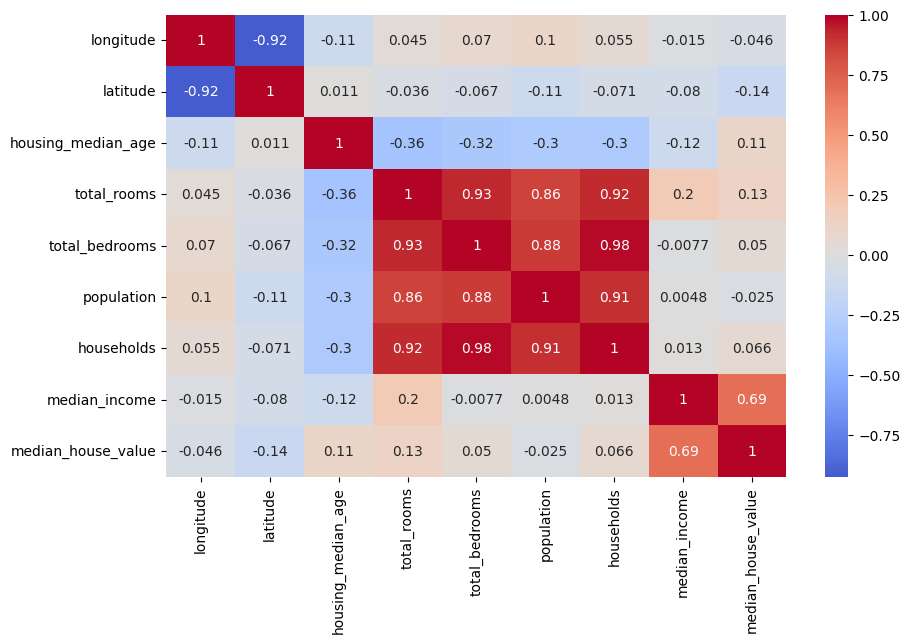

In [8]:
corr_matrix = df.iloc[:,:-1].corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

9. con las columnas definidas anteriormente, realiza un grafico pairplot empleando seaborn  de python.

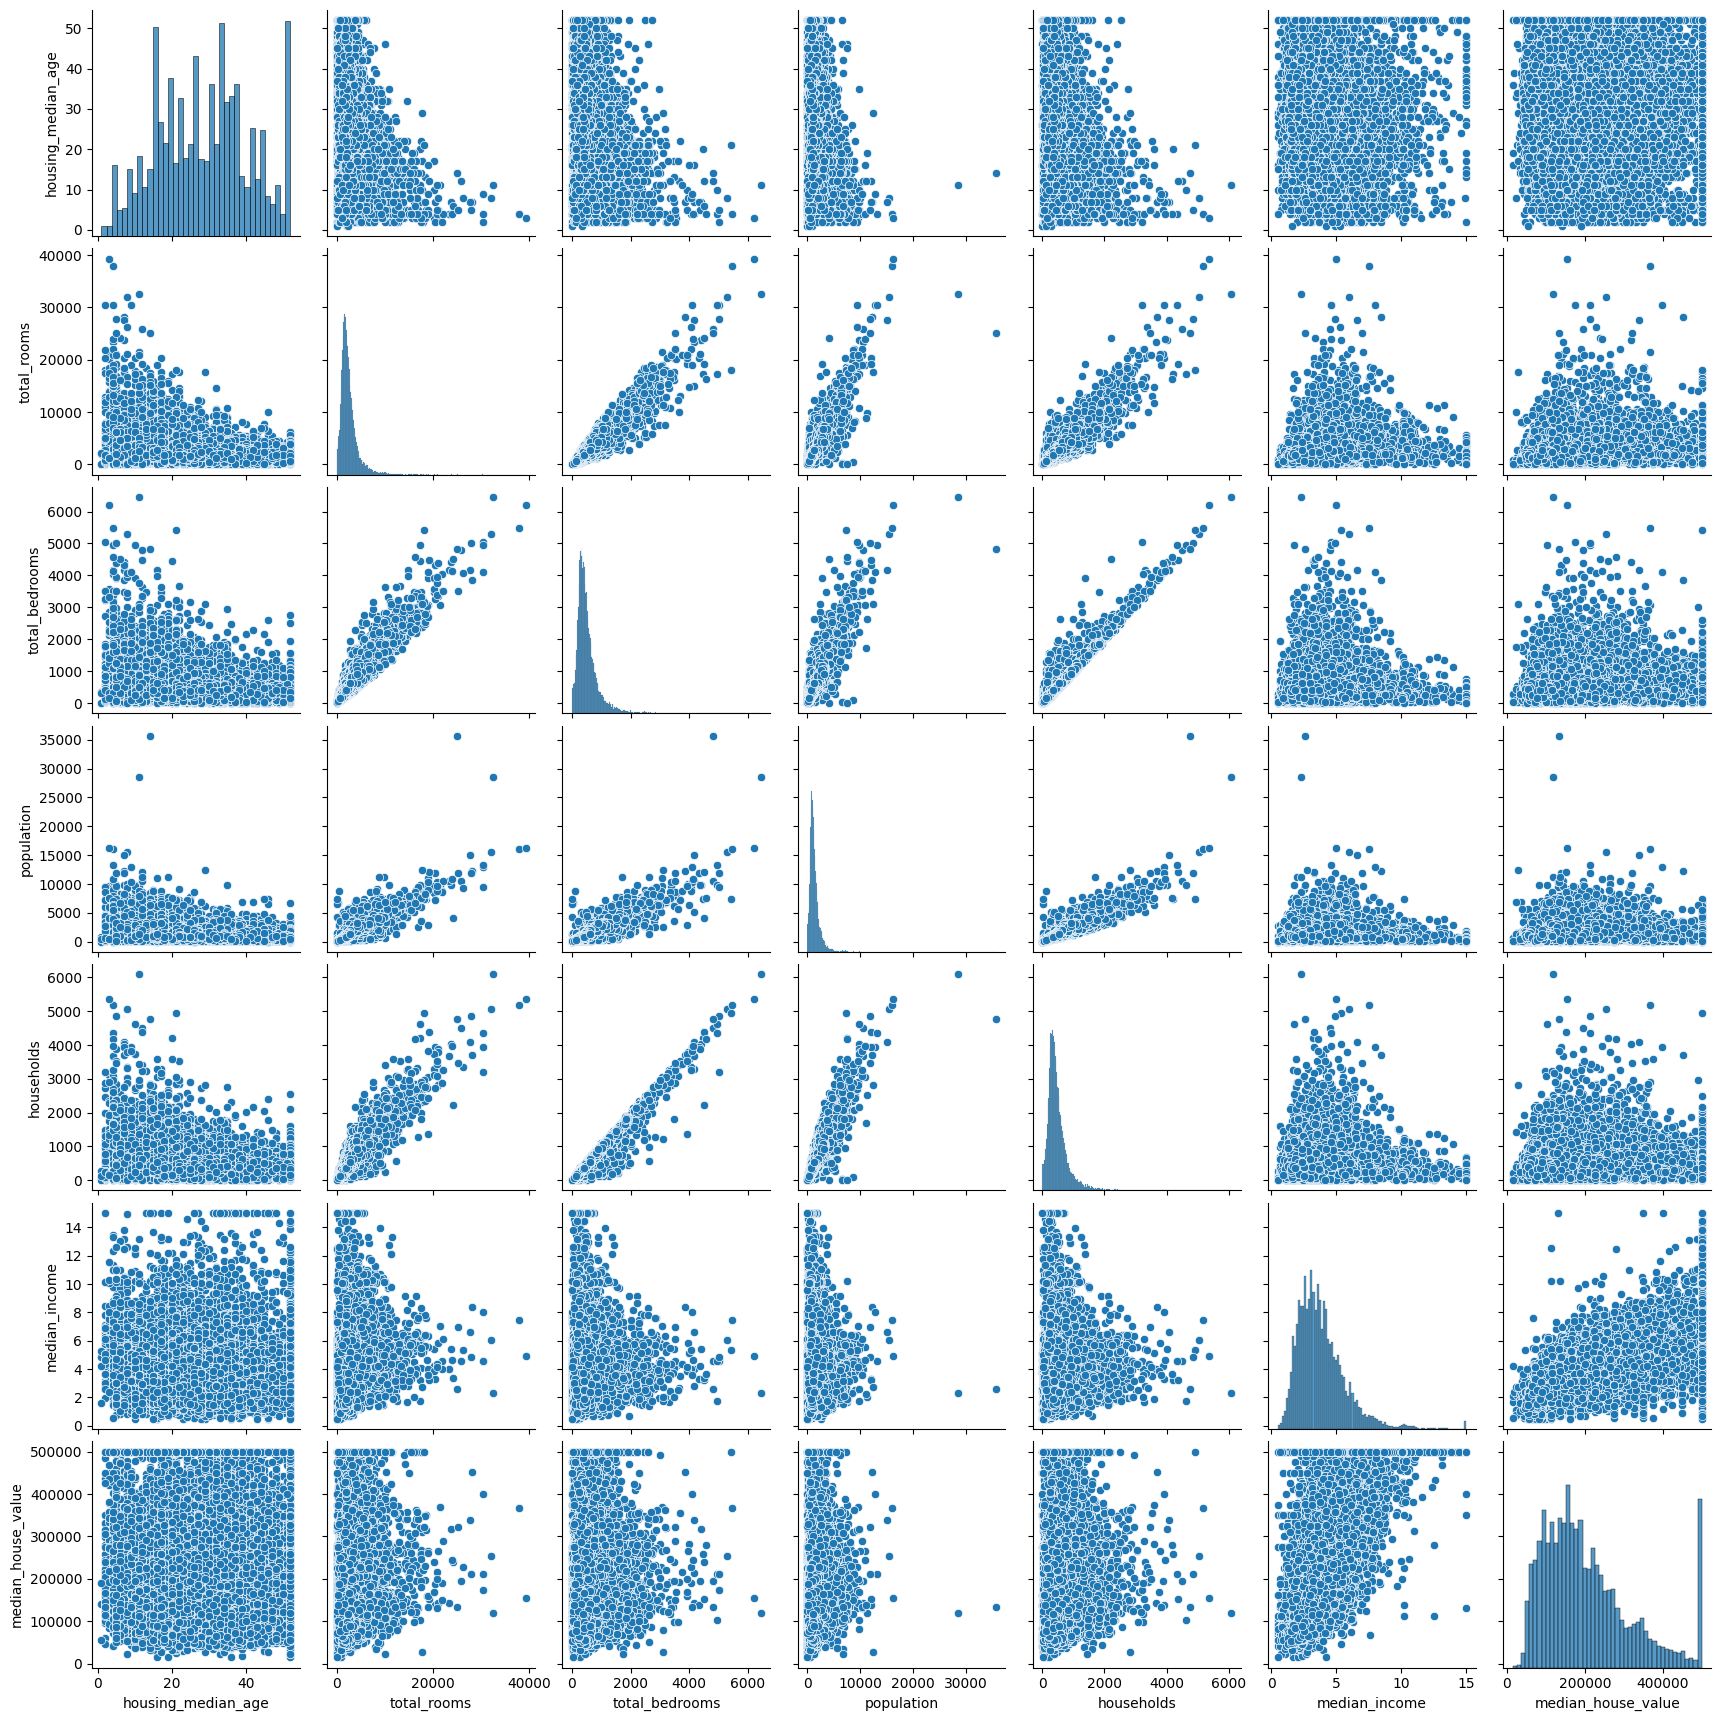

In [9]:
sns.pairplot(df[cols])
plt.show()

10. Realizaun scatter plot con la libreria seaborn de python, el color del grafico puede ser empleado con la columna `median_house_value`

Una buena manera de visualizar la variable de interés es por medio de un scatter plot de las posiciones de los distritos, pero coloreados en función de dicha variable objetivo, veamos:

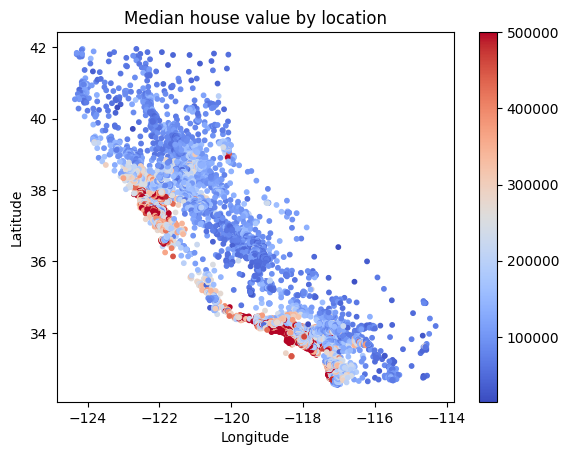

In [10]:
plt.scatter(df.longitude,df.latitude,c=df.median_house_value,cmap='coolwarm',s=10)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Median house value by location')
plt.show()

En el cual podemos apreciar facilmente que en las zonas costeras el valor medio de las viviendas es considerablemente superior al del resto de la región.

11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?

In [38]:

from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


La línea presentada es adecuada para separar el dataframe. El argumento `test_size` permite elegir el tamaño del subconjunto de datos de entrenamiento y, como el conjunto de datos es grande, el 20% de este es suficiente para probar la fiabilidad del modelo conseguido por medio del otro 80% de los datos. Por otro lado, `random_state` es la semilla inicial que se usará para generar los subconjuntos aleatorios, asignar un valor específico permite que los resultados estén dotados de reproductibilidad, ponerle el valor 42 es debido a una referencia a modo de broma referente al libro "Hitchhiker's guide to the galaxy", en el cual el número 42 es "la respuesta a la vida, el universo y todo lo demás".

12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se está analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

<Axes: >

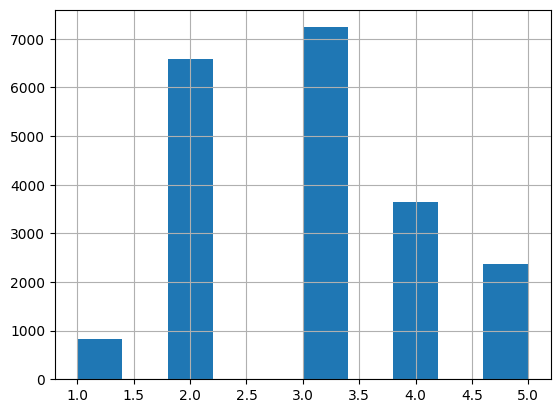

In [36]:
from sklearn.model_selection import train_test_split

df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

La forma automatica de realizar la división puede ser la siguiente:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

La partición estratificada solo puede ser empleada usando columnas numéricas como argumento.

Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

In [40]:
df["income_cat"].value_counts() / len(df)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [43]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [47]:
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

income_cat
3    0.348716
2    0.324188
4    0.173147
5    0.114159
1    0.039789
Name: count, dtype: float64

Las anteriores líneas muestran las proporciones internas de los elementos de estratificación en la tabla, primero considerando la tabla completa, luego solamente el conjunto de entrenamiento estratificado y por último del conjunto de entrenamiento por medio del método convencional.

Es claro que la clasificación estratificada permite que los subconjuntos de entrenamiento y prueba conserven la misma naturaleza que los datos completos, de manera que los resultados permitiran obtener resultados más fieles a la naturaleza del fenómeno en particular que se esté analizando; las proporciones obtenidas por medio del método convencional son levemente diferentes para los datos de entrenamiento comparados con el conjunto de datos en su totalidad.

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

In [50]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


Aquí vemos claramente la ventaja de realizar la separación de manera estratificada en comparación con la forma aleatoria, claramente el error porcentual indica que las muestras estratificadas representan con mayor fidelidad la distribución aleatoria a la cual subyace el conjunto de datos completo.

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:

In [56]:
df_train = strat_train_set
df_test = strat_test_set

df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3,6.096552,0.182692,3.167241


## Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

In [ ]:
df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

## imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):

In [ ]:
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

# solo cols numéricas
df_train_num = df_train.drop("ocean_proximity", axis=1)

# imputador para rellenar los NaN con la media de cada columna
imp_mean = SimpleImputer( strategy='mean')

# ajustar el imputador al dataframe (no lo modifica)
imp_mean.fit(df_train_num)

# array con las medias por col
imp_mean.statistics_

array([-1.19575635e+02,  3.56393144e+01,  2.86534036e+01,  2.62253979e+03,
        5.34944162e+02,  1.41968738e+03,  4.97011810e+02,  3.87588428e+00,
        2.07005322e+05,  3.00678295e+00,  5.44040595e+00,  2.14392022e-01,
        3.09646921e+00])

14. Compara las siguientes variables:

In [70]:
print(imp_mean.statistics_)
print('\n=================================================\n')
print(df_train_num.mean(numeric_only=True))

[-1.19575635e+02  3.56393144e+01  2.86534036e+01  2.62253979e+03
  5.34944162e+02  1.41968738e+03  4.97011810e+02  3.87588428e+00
  2.07005322e+05  3.00678295e+00  5.44040595e+00  2.14392022e-01
  3.09646921e+00]


longitude                     -119.575635
latitude                        35.639314
housing_median_age              28.653404
total_rooms                   2622.539789
total_bedrooms                 534.944162
population                    1419.687379
households                     497.011810
median_income                    3.875884
median_house_value          207005.322372
rooms_per_household              5.440406
bedrooms_per_room                0.214392
population_per_household         3.096469
dtype: float64


Ambas lineas entregan el mismo resultado, sinembargo la segunda lo hace de una forma más ordenada y legible; para efectos prácticos probablemente sea más conveniente la primera opción.

Construye la matríz de caracteristicas:

In [72]:
X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

# Manejo de texto y atributos categóricos

15.  ¿Qué realizan las siguientes lineas de código?


In [84]:
from sklearn.preprocessing import OneHotEncoder
housing_cat=df_train[["ocean_proximity"]]

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
#print(housing_cat_1hot)
#print(cat_encoder.categories_)

df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

En las líneas anteriores, inicialmente se extrae la columna categórica del conjunto de datos de entrenamiendo (en doble corchete para que sea de tipo DataFrame en lugar de una serie de pandas). Luego se construye el codificador categórico, el argumento `sparce_output=False` permite que la salida sea un arreglo de numpy en lugar de una matriz de tipo `scipy.sparce`. Después de esto se realiza el fit del codificador a la tabla categórica `housing_cat`, de manera que cada categoría resulta en un vector binario (`[0. 0. 0. 1. 0.]`), en el cual el único valor en uno corresponde a la categoría específica. Finalmente se construye un nuevo DataFrame que contiene las nuevas columnas categóricas que elmplean el sistema binario de clasificación.

16. Las variables pueden ser escaladas como sigue:

In [96]:
cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]


housing_scale = housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

In [23]:
# PREPARACIÓN ORDENADA DEL DATAFRAME
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")



# Limpieza de datos
#====================================================================================#

from sklearn.impute import SimpleImputer

df_num = df.drop('ocean_proximity', axis=1)
imp_mean = SimpleImputer(strategy='mean')

imp_mean.fit(df_num)
X = imp_mean.transform(df_num)
df_clean = pd.DataFrame(X, columns=df_num.columns)

#====================================================================================#



# Escalamiento de variables
#====================================================================================#

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_clean)
X = scaler.transform(df_clean)

df_escaled = pd.DataFrame(X, columns=df_clean.columns)

#====================================================================================#



# Manejo de texto y atriburos categóricos
#====================================================================================#

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat = df[['ocean_proximity']]

X = cat_encoder.fit_transform(housing_cat)
housing_cat_ = pd.DataFrame(X, columns=cat_encoder.categories_[0])

df_ready = df_escaled.join(housing_cat_)

#====================================================================================#



# Separación del dataframe en datos de entrenamiento y prueba
#====================================================================================#

from sklearn.model_selection import StratifiedShuffleSplit

# col cat de la variable objetivo por percentiles
df_ready['hv_cat'] = pd.qcut(df_ready['median_house_value'],q=5,labels=[1,2,3,4,5])


split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df_ready, df_ready['hv_cat']):
  df_train = df_ready.loc[train_index]
  df_test = df_ready.loc[test_index]

#====================================================================================#

Con lo anterior se consiguen dos dataframe, cada uno con las características y datos debidamente etiquetados.